### Importing librairies

In [1]:
import numpy as np
import pandas as pd
import streamlit as st
import string
from PIL import Image

#LIBRARIES
import numpy as np # linear algebra
import pandas as pd # data processing
#Graphics
#import matplotlib.pyplot as plt
#import seaborn as sns
#KNeighbors
from sklearn.neighbors import NearestNeighbors
#Scalers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Data selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
#METRICS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.metrics import mean_squared_error
#RANDOM
import random as rd
#IMPORTING LIBRAY TO GET GOOGLE SPREADSHEETS
import gspread



### FIRST STREAMLIT CODE

In [18]:
#global link1
########################################################### FIRST CODING
df = pd.read_csv("Beev Electric Vehicle Specs Data.csv")
df_new = pd.DataFrame(zip(df['Full Name'],df['Brand'], df['Model'], df['Main Price'], df['Category']))
df_new.rename(columns = {0:'Full Name', 1:'Brand', 2:'Model', 3:'Main Price',4: 'Category'}, inplace = True)
df_new['Main Price'].value_counts(dropna = False)   # We either drop the Nans or we fill with the average
df_new['Main Price'].fillna(df_new['Main Price'].mean(), inplace = True) 
X = df_new[['Main Price']]          
distanceKNN = NearestNeighbors(n_neighbors=3).fit(X)
distanceKNN.kneighbors([[60000]], 3, return_distance = False)
#df[['Full Name', 'Main Price']].iloc[[148, 16, 57]]
categories = list(df['Category'].unique())
categories.insert(0,"ALL")

image = Image.open('BEEV_image.png')
st.image(image)
st.title("Let's check which EV cars would suit to you")
value_one = st.text_area("text box")

#Code below to check
if category_choosen!= "ALL":
    df['Category'] == category_choosen
else: category_choosen = "" # to check if we can filter the DF if category_choosen ==""
        
# st.write("similar unique words",dict2)
label1 = "please select the category of the car you would like"
category_choosen = st.selectbox(label1,categories)
st.write(category_choosen)
if st.button('Get info'):
  st.write(value_one)

/Users/cedricpinel/opt/anaconda3/envs/streamlite/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


### SECOND STREAMLIT CODE

In [19]:
################################SECOND CODE
#loading and cleaning dataframe
df = pd.read_csv("Beev Electric Vehicle Specs Data.csv")
df['Main Price'].fillna(62000.0, inplace = True)
df['Range (km)'].fillna(235.0, inplace = True)
df_new = pd.DataFrame(zip(df['Full Name'],df['Main Price'],df['Range (km)'], df['Category'],df['Useable Battery Capacity']))
df_new.rename(columns = {0:'Full Name', 1:'Price (€)',2:'Range (km)',3:'Category',4:'Useable Battery Capacity'}, inplace = True)
df_model = df_new
df_model['Price with Incentive (€)'] = df_model['Price (€)'].apply(lambda item: item - 6000)
df_model['Price (€)'] = df_model['Price (€)'].astype(int)
df_model['Price with Incentive (€)'] = df_model['Price with Incentive (€)'].astype(int)
df_model['Range (km)'] = df_model['Range (km)'].astype(int)
df_model['cost/100Km (€)'] = df_model[['Range (km)','Useable Battery Capacity']].apply(lambda item: (item[1]/item[0])*100*0.0125, axis = 1)

#DF Filtered
df_filtered = df[['Full Name', 'Model', 'Brand','Range (km)','Battery Capacity (kW)', 'Useable Battery Capacity','Category','Government Incentive Category for Help','Vehicle Consumption (Wh)','Charging Time 7,4 kW','Charging Time 11 kW','Main Price']].copy()
df_filtered['cost/100Km (€)'] = df_filtered[['Range (km)','Useable Battery Capacity']].apply(lambda item: (item[1]/item[0])*100*0.0125, axis = 1)
df_filtered['Price with Incentive'] = df_filtered['Main Price'].apply(lambda item: item - 6000)

#Getting the title_tax_cv and build the list of regions for the choice in the interface
#gc = gspread.service_account_from_dict(my_dict)
gc = gspread.service_account(filename='../../Wild_Code_School/keys/beev-335814-edfca510cf50.json')
#sh = gc.open(name of file)
#title_tax_cv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
title_tax_cv_url = "https://docs.google.com/spreadsheets/d/1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing"
sht1 = gc.open_by_url(title_tax_cv_url)
worksheet = sht1.sheet1

title_tax_cv = pd.DataFrame(worksheet.get_all_records())
#Building the list
regions = list(title_tax_cv['Region'].unique())

#building categories list for select box choice
categories = list(df['Category'].unique())
categories.insert(0,"ALL")

### start streamlit
image = Image.open('BEEV_image.png')
st.image(image)
st.title("Let's check which EV cars would suit to you")

#Defining the selectbox for the vehicle categories
label1 = "please select the category of the car you would like"
category_choosen = st.selectbox(label1,categories)
#Defining the selectbox for the region ########### be careful need to add the DF and the regions variable before here
label2 = "please select the region you are from"
region_choosen = st.selectbox(label2,regions)

#st.write(category_choosen)

#Asking the user the Price and the Range
# Add a slider to the sidebar:
range_slider = st.sidebar.slider('Select a desired range in Kilometers',200, 800, (250))
price_slider = st.sidebar.slider('Select a desired price for the EV car',10000, 100000, (15000))
duration_slider = st.sidebar.slider('Select a desired duration for leasing or keeping EV car in months',1, 72, (12))
km_slider = st.sidebar.slider('Select Km done per year',1000, 100000, (10000))

#Define the validation button
if st.button('Get EV Cars recommendation'):
    if category_choosen != "ALL":
        #We need to filter the DF to avoid pb with index when displaying the result
        df_model = df_model[df_model['Category'] == category_choosen].copy()
        X = df_model[['Price (€)', 'Range (km)']]
        distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(X)
        result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)
    else:
        X = df_model[['Price (€)','Range (km)']].copy()        
        distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(X)
        result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)
    #st.write(result)
    #for i in range(5):
    #    st.write(df_model[['Full Name', 'Price','Range','Category','Price with Incentive']].iloc[[result[0][i]]])
    #Building the TCO
    df_TCO = df_model[['Full Name', 'Price (€)','Range (km)','Category','Price with Incentive (€)','cost/100Km (€)']].iloc[result[0]].set_index('Full Name').copy()
    df_TCO['title_cost (€)'] = df_TCO['cost/100Km (€)'].apply(lambda item: title_tax_cv[title_tax_cv['Region'] == region_choosen]['Title Cost (€ / CV)']*1)
    df_TCO['consumption_cost (month)'] = df_TCO['cost/100Km (€)'].apply(lambda item: item/100*km_slider/12)
    df_TCO['maintenance_cost (month)'] = df_TCO['cost/100Km (€)'].apply(lambda item: km_slider/12*0.208)
    df_TCO['TCO_month'] = df_TCO[['title_cost (€)','consumption_cost (month)','maintenance_cost (month)']].apply(lambda item: item[0] + item[1] + item[2],axis=1)
    df_TCO['TCO_year'] = df_TCO[['title_cost (€)','consumption_cost (month)','maintenance_cost (month)']].apply(lambda item: item[0] + item[1]*12 + item[2]*12,axis=1)
    df_TCO['TCO_duration'] = df_TCO[['title_cost (€)','consumption_cost (month)','maintenance_cost (month)']].apply(lambda item: item[0] + item[1]*duration_slider + item[2]*duration_slider,axis=1)
    st.write(df_TCO)
    

#  Business to customer interface with slider selection for features

In [7]:
#importing the googlesheet document named fuel prices
gc = gspread.service_account(filename='../../Wild_Code_School/keys/beev-335814-edfca510cf50.json')
fuel_prices_url = 'https://docs.google.com/spreadsheets/d/1M_e1ENe40v-G_HYYH7YTZT5yPMoxgk36FFNamtg12f8/edit?usp=sharing'
sht4 = gc.open_by_url(fuel_prices_url)
#sht4.sheet1
worksheet = sht4.sheet1
fuel_prices = pd.DataFrame(worksheet.get_all_records())
fuel_prices.to_csv('fuel_prices_db',header=True, index=False)
elec_price = float(fuel_prices[fuel_prices['Fuel type'] == 'Electricity']['Price France (€/litres) - KWh'])

#importing the googlesheet document named title_tax_cv
title_tax_cv_url = "https://docs.google.com/spreadsheets/d/1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing"
sht1 = gc.open_by_url(title_tax_cv_url)
worksheet = sht1.sheet1
#Building the DF
title_tax_cv = pd.DataFrame(worksheet.get_all_records())
title_tax_cv.to_csv('title_tax_cv_db',header=True, index=False)


In [9]:
pd.read_csv('title_tax_cv_db')

,Region,Title Cost (€ / CV),Exonaration EV,Exoneration Hybrid
0,Alsace,42.00,100%,50%
1,Champagne-Ardenne,42.00,100%,100%
2,Lorraine,42.00,100%,50%
3,Aquitaine,41.00,100%,100%
4,Limousin,41.00,100%,100%
5,Poitou-Charentes,41.00,100%,100%
6,Auvergne,43.00,100%,100%
7,Rhône-Alpes,43.00,100%,100%
8,Basse-Normandie,35.00,100%,100%
9,Haute-Normandie,35.00,100%,100%


In [8]:
title_tax_cv.head()

,Region,Title Cost (€ / CV),Exonaration EV,Exoneration Hybrid
0,Alsace,42.0,100%,50%
1,Champagne-Ardenne,42.0,100%,100%
2,Lorraine,42.0,100%,50%
3,Aquitaine,41.0,100%,100%
4,Limousin,41.0,100%,100%


In [ ]:
### Business to customer interface with slider selection for features


#Changing the background with an image that has to be in the same folder
import base64
main_bg = "st_back_main3.jpeg"
main_bg_ext = "jpeg"

side_bg = "st_back_slider.jpeg"
side_bg_ext = "jpeg"

st.markdown(
    f"""
    <style>
    .reportview-container {{
        background: url(data:image/{main_bg_ext};base64,{base64.b64encode(open(main_bg, "rb").read()).decode()});
        background-size: 100% 100%
    }}
   .sidebar.sidebar-content {{
        background: url(data:image/{side_bg_ext};base64,{base64.b64encode(open(side_bg, "rb").read()).decode()});
        background-size: 100% 100%
    }}
    </style>
    
    """,
    unsafe_allow_html=True
)

#importing the googlesheet document named fuel prices
gc = gspread.service_account(filename='../../Wild_Code_School/keys/beev-335814-edfca510cf50.json')
fuel_prices_url = 'https://docs.google.com/spreadsheets/d/1M_e1ENe40v-G_HYYH7YTZT5yPMoxgk36FFNamtg12f8/edit?usp=sharing'
sht4 = gc.open_by_url(fuel_prices_url)
#sht4.sheet1
worksheet = sht4.sheet1
fuel_prices = pd.DataFrame(worksheet.get_all_records())
fuel_prices.to_csv(header=True, index=False)
elec_price = float(fuel_prices[fuel_prices['Fuel type'] == 'Electricity']['Price France (€/litres) - KWh'])


#Code for EV DF
df = pd.read_csv("Beev Electric Vehicle Specs Data.csv")
df['Main Price'].fillna(62000.0, inplace = True)
df['Range (km)'].fillna(235.0, inplace = True)
df_new = pd.DataFrame(zip(df['Full Name'],df['Main Price'],df['Range (km)'], df['Category'],df['Useable Battery Capacity']))
df_new.rename(columns = {0:'Full Name', 1:'Price (€)',2:'Range (Km)',3:'Category',4:'Useable Battery Capacity'}, inplace = True)
df_model = df_new
df_model['Price with Incentive (€)'] = df_model['Price (€)'].apply(lambda item: item - 6000)
df_model['Price (€)'] = df_model['Price (€)'].astype(int)
df_model['Price with Incentive (€)'] = df_model['Price with Incentive (€)'].astype(int)
df_model['Range (Km)'] = df_model['Range (Km)'].astype(int)
df_model['cost/100Km (€)'] = df_model[['Range (Km)','Useable Battery Capacity']].apply(lambda item: (item[1]/item[0])*100*elec_price, axis = 1)
#Building the categories for the choice in selectbox
categories = list(df['Category'].unique())
categories.insert(0,"ALL")

#DF Filtered
df_filtered = df[['Full Name', 'Model', 'Brand','Range (km)','Battery Capacity (kW)', 'Useable Battery Capacity','Category','Government Incentive Category for Help','Vehicle Consumption (Wh)','Charging Time 7,4 kW','Charging Time 11 kW','Main Price']].copy()
df_filtered['cost/100Km (€)'] = df_filtered[['Range (km)','Useable Battery Capacity']].apply(lambda item: (item[1]/item[0])*100*elec_price, axis = 1)
df_filtered['Price with Incentive'] = df_filtered['Main Price'].apply(lambda item: item - 6000)

#Getting the title_tax_cv and build the list of regions for the choice in the interface

#sh = gc.open(name of file)
#title_tax_cv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
title_tax_cv_url = "https://docs.google.com/spreadsheets/d/1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing"
sht1 = gc.open_by_url(title_tax_cv_url)
worksheet = sht1.sheet1
#Building the DF
title_tax_cv = pd.DataFrame(worksheet.get_all_records())
#Building the list of regions for the selectbox
regions = list(title_tax_cv['Region'].unique())


### start streamlit
image = Image.open('BEEV_image.png')
st.image(image)
st.title("Let's check which EV cars would suit to you")
#value_one = st.text_area("text box")

#Defining the selectbox
label1 = "please select the category of the car you would like"
category_choosen = st.selectbox(label1,categories)
#Defining the selectbox for the region ########### be careful need to add the DF and the regions variable before here
label2 = "please select the region you are from"
region_choosen = st.selectbox(label2,regions)

#st.write(category_choosen)


#Asking the user the Price and the Range
# Add a slider to the sidebar:
if st.sidebar.button("Click here to actualize the data with the googlesheet documents"):
    
    
range_slider = st.sidebar.slider('Select a desired range in Kilometers',200, 800, (250))
price_slider = st.sidebar.slider('Select a desired price for the EV car',10000, 100000, (15000))
duration_slider = st.sidebar.slider('Select a desired duration for leasing or keeping EV car in months',1, 72, (12))
km_slider = st.sidebar.slider('Select Km done per year',1000, 100000, (10000))

#X = pd.DataFrame()
#Define the validation button
if st.button('Get EV Cars recommendation'):
    df_model.style.format({'Price (€)': '{:.0f}', 'Range (Km)': '{:.0f}', 'Price with Incentive (€)': '{:.0f}'})
    #distanceKNN_cars = NearestNeighbors()
    #result = np.array([])
    if category_choosen != "ALL":
        df_model = df_model[df_model['Category'] == category_choosen].copy()
        X = df_model[['Price (€)', 'Range (Km)']]
        distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(X)
        result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)
        #st.write(
    else:   
        distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(df_model[['Price (€)', 'Range (Km)']])
        result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)
    
    st.write(df_model[['Full Name', 'Price (€)','Range (Km)','Category','Price with Incentive (€)']].iloc[result[0]].set_index('Full Name'))
    #Building the TCO
    df_TCO = df_model[['Full Name', 'Price (€)','Range (Km)','Category','Price with Incentive (€)','cost/100Km (€)']].iloc[result[0]].set_index('Full Name').copy()
    df_TCO['title_cost (€)'] = df_TCO['cost/100Km (€)'].apply(lambda item: title_tax_cv[title_tax_cv['Region'] == region_choosen]['Title Cost (€ / CV)']*1)
    df_TCO['consumption_cost (month)'] = df_TCO['cost/100Km (€)'].apply(lambda item: item/100*km_slider/12)
    df_TCO['maintenance_cost (month)'] = df_TCO['cost/100Km (€)'].apply(lambda item: km_slider/12*0.0208)
    df_TCO['TCO_month'] = df_TCO[['title_cost (€)','consumption_cost (month)','maintenance_cost (month)']].apply(lambda item: item[0] + item[1] + item[2],axis=1)
    df_TCO['TCO_year'] = df_TCO[['title_cost (€)','consumption_cost (month)','maintenance_cost (month)']].apply(lambda item: item[0] + item[1]*12 + item[2]*12,axis=1)
    df_TCO['TCO_duration'] = df_TCO[['title_cost (€)','consumption_cost (month)','maintenance_cost (month)']].apply(lambda item: item[0] + item[1]*duration_slider + item[2]*duration_slider,axis=1)
    #Formating the result with choosen number (float)
    df_TCO.style.format({'Price (€)': '{:.0f}', 'Range (Km)': '{:.0f}', 'Price with Incentive (€)': '{:.0f}', 'cost/100Km (€)':'{:.0f}','TCO_year':'{:.1f}', 'TCO_duration': '{:.1f}'})
    st.write(df_TCO[['Range (Km)','Category','Price with Incentive (€)','TCO_year','TCO_duration']])

### Blocks below to debug

In [19]:
#Code to debug issues in Interface.py when running
df = pd.read_csv("Beev Electric Vehicle Specs Data.csv")
df['Main Price'].fillna(62000.0, inplace = True)
df['Range (km)'].fillna(235.0, inplace = True)
df_new = pd.DataFrame(zip(df['Full Name'],df['Main Price'],df['Range (km)'], df['Category']))
df_new.rename(columns = {0:'Full Name', 1:'Price',2:'Range',3:'Category'}, inplace = True)
df_model = df_new
df_model['Price with Incentive'] = df_model['Price'].apply(lambda item: item - 6000)

price_slider = 25000
range_slider = 10000

df_model = df_model[df_model['Category'] == 'Berline'].copy()
X = df_model[['Price', 'Range']]
distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(X)
result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)
        
        
#distanceKNN_cars = NearestNeighbors(n_neighbors=5).fit(X_select[['Price', 'Range']])
#result = distanceKNN_cars.kneighbors([[price_slider,range_slider]], 5, return_distance = False)

/Users/cedricpinel/opt/anaconda3/envs/streamlite/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [20]:
result
for i in range(5):
        print(df_model[['Full Name', 'Price','Range','Category','Price with Incentive']].iloc[[result[0][i]]])

          Full Name    Price  Range Category  Price with Incentive
67  MG MG5 Electric  29500.0  400.0  Berline               23500.0
                         Full Name    Price  Range Category  \
41  Hyundai IONIQ 5 Long Range AWD  43600.0  375.0  Berline   

    Price with Incentive  
41               37600.0  
                                 Full Name    Price  Range Category  \
124  Tesla Model 3 Autonomie Standard Plus  43800.0  491.0  Berline   

     Price with Incentive  
124               37800.0  
                          Full Name    Price  Range Category  \
125  Tesla Model 3 Grande Autonomie  52990.0  490.0  Berline   

     Price with Incentive  
125               46990.0  
      Full Name    Price  Range Category  Price with Incentive
101  Polestar 2  58900.0  470.0  Berline               52900.0


In [21]:
X

,Price,Range
3,103040.0,487.0
4,142830.0,472.0
16,59700.0,475.0
17,71650.0,450.0
41,43600.0,375.0
60,86720.0,660.0
61,127250.0,784.0
62,152800.0,672.0
67,29500.0,400.0
101,58900.0,470.0


In [22]:
df_model.iloc[5]

Full Name               Mercedes EQE 350
Price                            86720.0
Range                              660.0
Category                         Berline
Price with Incentive             80720.0
Name: 60, dtype: object

In [23]:
result

array([[ 8,  4, 13, 14,  9]])

In [24]:
dfresult=df_model[['Full Name', 'Price','Range','Category','Price with Incentive']].iloc[result[0]]

In [25]:
dfresult.set_index('Full Name')

,Price,Range,Category,Price with Incentive
Full Name,,,,
MG MG5 Electric,29500.0,400.0,Berline,23500.0
Hyundai IONIQ 5 Long Range AWD,43600.0,375.0,Berline,37600.0
Tesla Model 3 Autonomie Standard Plus,43800.0,491.0,Berline,37800.0
Tesla Model 3 Grande Autonomie,52990.0,490.0,Berline,46990.0
Polestar 2,58900.0,470.0,Berline,52900.0


In [26]:
df_model[['Full Name', 'Price','Range','Category','Price with Incentive']].iloc[result[0]].set_index('Full Name')

,Price,Range,Category,Price with Incentive
Full Name,,,,
MG MG5 Electric,29500.0,400.0,Berline,23500.0
Hyundai IONIQ 5 Long Range AWD,43600.0,375.0,Berline,37600.0
Tesla Model 3 Autonomie Standard Plus,43800.0,491.0,Berline,37800.0
Tesla Model 3 Grande Autonomie,52990.0,490.0,Berline,46990.0
Polestar 2,58900.0,470.0,Berline,52900.0


In [27]:
df_model.style.format({'Price': '{:.0f}', 'Range': '{:.0f}', 'Price with Incentive': '{:.0f}'})

,Full Name,Price,Range,Category,Price with Incentive
3,Audi e-tron GT quattro,103040,487,Berline,97040
4,Audi e-tron GT RS,142830,472,Berline,136830
16,BMW i4 eDrive40,59700,475,Berline,53700
17,BMW i4 M50,71650,450,Berline,65650
41,Hyundai IONIQ 5 Long Range AWD,43600,375,Berline,37600
60,Mercedes EQE 350,86720,660,Berline,80720
61,Mercedes EQS 450+,127250,784,Berline,121250
62,Mercedes EQS 580 4MATIC,152800,672,Berline,146800
67,MG MG5 Electric,29500,400,Berline,23500
101,Polestar 2,58900,470,Berline,52900


### Changing the backgroung in streamlit, need to store image in the same folder (Interface.py)

In [31]:
# code to check to change background in streamlit
import streamlit as st
import base64

main_bg = "st_back_main.jpeg"
main_bg_ext = "jpeg"

side_bg = "st_back_main.jpeg"
side_bg_ext = "jpeg"

st.markdown(
    f"""
    <style>
    .reportview-container {{
        background: url(data:image/{main_bg_ext};base64,{base64.b64encode(open(main_bg, "rb").read()).decode()})
    }}
   .sidebar .sidebar-content {{
        background: url(data:image/{side_bg_ext};base64,{base64.b64encode(open(side_bg, "rb").read()).decode()})
    }}
    </style>
    """,
    unsafe_allow_html=True
)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

### Building the final DF with right features to be able to calculate TCO

In [32]:
df.head()

,Full Name,Model,Brand,Acceleration (0-100 km/h),Range (km),Average Winter Range,Highway Winter Range,City Winter Range,Average Summer Range,Highway Summer Range,...,Type of Driver,Max Speed,Max Trunk Volume (mm),Min Trunk Volume (mm),youtube_video,Creation Date,Modified Date,Slug,Creator,unique id
0,Aiways U5,U5,Aiways,7.5,410.0,285.0,235.0,340.0,385.0,300.0,...,NaN,150.0,1555.0,432.0,NaN,"Sep 19, 2021 20:50","Oct 20, 2021 15:48",NaN,(App admin),1632077402600x431044176816571400
1,Audi e-tron 50 quattro,e-tron 50,Audi,6.8,280.0,240.0,205.0,285.0,320.0,255.0,...,1.0,190.0,1725.0,660.0,NaN,"Jul 20, 2020 15:44","Nov 16, 2021 10:24",NaN,(deleted thing),1595252663946x895911395902033000
2,Audi e-tron 55 quattro,e-tron 55,Audi,5.7,437.0,315.0,265.0,370.0,410.0,330.0,...,1.0,200.0,1725.0,660.0,NaN,"Jul 20, 2020 11:53","Nov 16, 2021 10:29",NaN,(deleted thing),1595238801413x563796210467635700
3,Audi e-tron GT quattro,e-tron GT quattro,Audi,4.1,487.0,355.0,305.0,405.0,475.0,390.0,...,NaN,245.0,NaN,405.0,NaN,"Sep 19, 2021 22:07","Nov 16, 2021 10:37",NaN,(App admin),1632082037901x768751924168235500
4,Audi e-tron GT RS,e-tron GT RS,Audi,3.3,472.0,345.0,295.0,395.0,460.0,375.0,...,NaN,250.0,NaN,366.0,NaN,"Sep 19, 2021 22:13","Nov 16, 2021 10:41",NaN,(App admin),1632082391017x236732476503401120


In [33]:
df.columns

Index(['Full Name', 'Model', 'Brand', 'Acceleration (0-100 km/h)',
       'Range (km)', 'Average Winter Range', 'Highway Winter Range',
       'City Winter Range', 'Average Summer Range', 'Highway Summer Range',
       'City Summer Range', 'Optimal Slow Charge', 'Optimal Fast Charge',
       'Battery Capacity (kW)', 'Useable Battery Capacity', 'Category',
       'Government Incentive Category for Help', 'Vehicle Consumption (Wh)',
       'Average Winter Consumption', 'Highway Winter Consumption',
       'City Winter Consumption', 'Average Summer Consumption',
       'Highway Summer Consumption', 'City Summer Consumption', 'Torque',
       'Availability - deleted', 'Distance', 'Main Finishes', 'Finishes',
       'Height (mm)', 'Main Image', 'Product Image', 'Images', 'Width',
       'Last Edition of Finishes Date', 'Length (mm)', 'Label',
       'Average Range', 'Seats', 'Empty Weight (kg)', 'Max Price', 'Min Price',
       'Slow Charge Port', 'Fast Charge Port', 'Main Price',
       'M

In [28]:
df_filtered = df[['Full Name', 'Model', 'Brand','Range (km)','Battery Capacity (kW)', 'Useable Battery Capacity','Category','Government Incentive Category for Help','Vehicle Consumption (Wh)','Charging Time 7,4 kW','Charging Time 11 kW','Main Price']].copy()
df_filtered.head()

,Full Name,Model,Brand,Range (km),Battery Capacity (kW),Useable Battery Capacity,Category,Government Incentive Category for Help,Vehicle Consumption (Wh),"Charging Time 7,4 kW",Charging Time 11 kW,Main Price
0,Aiways U5,U5,Aiways,410.0,63.0,63.0,SUV,VP,166.0,11h15,20h15,39300.0
1,Audi e-tron 50 quattro,e-tron 50,Audi,280.0,71.0,64.7,SUV,VP,231.0,10h30,7h,71900.0
2,Audi e-tron 55 quattro,e-tron 55,Audi,437.0,95.0,86.5,SUV,VP,237.0,13h45,9h15,84200.0
3,Audi e-tron GT quattro,e-tron GT quattro,Audi,487.0,93.4,85.0,Berline,VP,202.0,13h30,9h15,103040.0
4,Audi e-tron GT RS,e-tron GT RS,Audi,472.0,93.4,85.0,Berline,VP,210.0,13h30,9h15,142830.0


In [35]:
df['Main Price'].isna().sum()

0

In [30]:
#Adding the column cost in Euros per 100km
df_filtered['cost/100Km (€)'] = df_filtered[['Range (km)','Useable Battery Capacity']].apply(lambda item: (item[1]/item[0])*100*0.0125, axis = 1)
df_filtered['Price with Incentive'] = df_filtered['Main Price'].apply(lambda item: item - 6000)
df_filtered.head()

,Full Name,Model,Brand,Range (km),Battery Capacity (kW),Useable Battery Capacity,Category,Government Incentive Category for Help,Vehicle Consumption (Wh),"Charging Time 7,4 kW",Charging Time 11 kW,Main Price,cost/100Km (€),Price with Incentive
0,Aiways U5,U5,Aiways,410.0,63.0,63.0,SUV,VP,166.0,11h15,20h15,39300.0,0.192073,33300.0
1,Audi e-tron 50 quattro,e-tron 50,Audi,280.0,71.0,64.7,SUV,VP,231.0,10h30,7h,71900.0,0.288839,65900.0
2,Audi e-tron 55 quattro,e-tron 55,Audi,437.0,95.0,86.5,SUV,VP,237.0,13h45,9h15,84200.0,0.247426,78200.0
3,Audi e-tron GT quattro,e-tron GT quattro,Audi,487.0,93.4,85.0,Berline,VP,202.0,13h30,9h15,103040.0,0.218172,97040.0
4,Audi e-tron GT RS,e-tron GT RS,Audi,472.0,93.4,85.0,Berline,VP,210.0,13h30,9h15,142830.0,0.225106,136830.0


### A bit of data analysis on EV database

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Range (km)', ylabel='Count'>

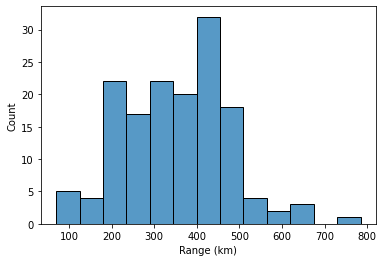

In [38]:
sns.histplot(df['Range (km)'])

<AxesSubplot:xlabel='Battery Capacity (kW)', ylabel='Count'>

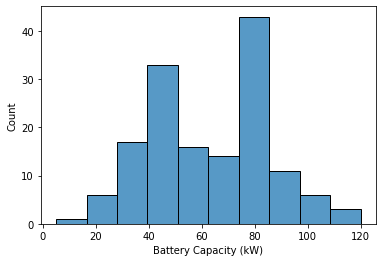

In [39]:
sns.histplot(df['Battery Capacity (kW)'])

<AxesSubplot:xlabel='Vehicle Consumption (Wh)', ylabel='Count'>

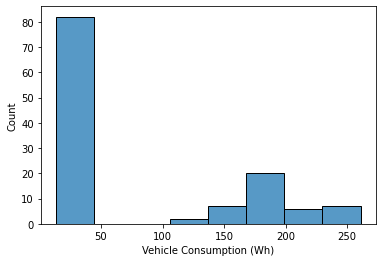

In [40]:
sns.histplot(df['Vehicle Consumption (Wh)'])

<AxesSubplot:xlabel='Main Price', ylabel='Count'>

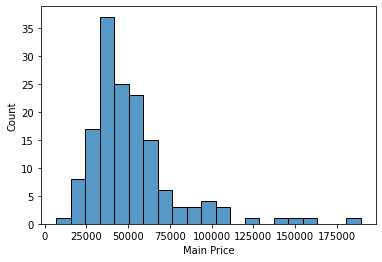

In [41]:
sns.histplot(df['Main Price'])

### Importing the google sheets from BEEV to be able to calculate with updated value from the google sheets when updated

In [42]:
#“xlrd”, “openpyxl”, “odf”, “pyxlsb”
#sheet_id = '1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing'
#sheet_name = 'Title_Taxe_CV'
#url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
#test=pd.read_csv(url,usecols=['Region','Title Cost (€ / CV)','Exonaration EV','Exoneration Hybrid'])
#test

#title_tax.iloc[1:40]
#title_tax = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv",on_bad_lines='skip',header=1)#,header = 1,engine = "openpyxl",nrows = 40,usecols = "A:D")#, on_bad_lines='skip',header=1)

#sheet_id = '1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing'
    
#title_tax = pd.read_csv(url,on_bad_lines='skip',header=1)#,header = 1,engine = "openpyxl",nrows = 40,usecols = "A:D")#, on_bad_lines='skip',header=1)


In [2]:
#importing the googlesheet document named Title_Taxe_CV
#beev-335814-13ad14e5392c ### this is the json file with the key to be granted accessing the google API
import gspread
gc = gspread.service_account(filename='../../Wild_Code_School/keys/beev-335814-edfca510cf50.json')
#sh = gc.open(name of file)
#title_tax_cv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
title_tax_cv_url = "https://docs.google.com/spreadsheets/d/1cOj98R9fGT89rG4-TxAPIgOrvDbrzxlLPd4Y5mUBD0g/edit?usp=sharing"
sht1 = gc.open_by_url(title_tax_cv_url)
worksheet = sht1.sheet1

title_tax_cv = pd.DataFrame(worksheet.get_all_records())
title_tax_cv

,Region,Title Cost (€ / CV),Exonaration EV,Exoneration Hybrid
0,Alsace,42.00,100%,50%
1,Champagne-Ardenne,42.00,100%,100%
2,Lorraine,42.00,100%,50%
3,Aquitaine,41.00,100%,100%
4,Limousin,41.00,100%,100%
5,Poitou-Charentes,41.00,100%,100%
6,Auvergne,43.00,100%,100%
7,Rhône-Alpes,43.00,100%,100%
8,Basse-Normandie,35.00,100%,100%
9,Haute-Normandie,35.00,100%,100%


In [3]:
# This code has to be before the streamlit code to be able to give the selct box
regions = list(title_tax_cv['Region'].unique())

In [4]:
#importing the googlesheet document named bonus malus
bonus_malus_url = 'https://docs.google.com/spreadsheets/d/1RDIMbTGE3TBU4SXbRNKiqKQFakf0grVGKKLfu9L9dS4/edit?usp=sharing'

sht2 = gc.open_by_url(bonus_malus_url)
sht2.sheet1
worksheet = sht2.sheet1

bonus_malus = pd.DataFrame(worksheet.get_all_records())
bonus_malus

,g / km,Malus (€),,EV cars,Bonus (€)
0,128,50,,ALL EV,6000
1,129,75,,,
2,130,100,,,
3,131,125,,,
4,132,150,,,
...,...,...,...,...,...
91,219,35 324,,,
92,220,36 447,,,
93,221,37 595,,,
94,222,38 767,,,


In [5]:
item = 150
def malus_calculation(item):
    malus = 0
    if item< bonus_malus['g / km'].min():
        malus = 0
    elif item > bonus_malus['g / km'].max():
        malus = bonus_malus['Malus (€)'].max()
    else :
        malus_index = bonus_malus['Malus (€)'][bonus_malus['g / km'] == item].index[0]       
        malus = bonus_malus['Malus (€)'].iloc[malus_index]
    return malus
malus_calculation(item)

2022-01-30 17:10:34.559 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


983

In [6]:
bonus_malus['Malus (€)'][bonus_malus['g / km'] == 150]
malus_index = bonus_malus['Malus (€)'][bonus_malus['g / km'] == 150].index[0]
bonus_malus['Malus (€)'].iloc[malus_index]

983

In [7]:
bonus_malus['Malus (€)'] = bonus_malus['Malus (€)'].apply(lambda item: item.replace(' ','') if type(item) == str else item)
bonus_malus['Malus (€)'] = bonus_malus['Malus (€)'].astype(int)

for value in bonus_malus['Malus (€)']:
    if type(value) == str:
        print(value)

In [11]:
#importing the googlesheet document named maintenance costs
maintenance_costs_url = 'https://docs.google.com/spreadsheets/d/1Hlhp4ubS-JFgYYx1S9oeL5A_011sSxvKzWiuS3bLqV8/edit?usp=sharing'

sht3 = gc.open_by_url(maintenance_costs_url)
sht3.sheet1
worksheet = sht3.sheet1

maintenance_costs = pd.DataFrame(worksheet.get_all_records())
maintenance_costs


,Brand,Average Gas engine (€/km),Average EV (€/km),
0,Peugeot,234,152,
1,Cirtoën,208,135,
2,Renault,248,161,
3,Dacia,126,82,
4,Mazda,167,109,
5,Volkswagen,187,122,
6,Toyota,212,138,
7,Ford,213,138,
8,Seat,221,144,
9,Iveco,229,149,


In [12]:
def EV_maint_cost_coef(item):
        if item in list(maintenance_costs['Brand'].value_counts().keys()):
            return maintenance_costs['Average EV (€/km)'].iloc[maintenance_costs[maintenance_costs['Brand'] == item].index[0]]
        else: return round(maintenance_costs['Average EV (€/km)'].mean(),2)

In [14]:
full_name = "Dacia Sandero"

EV_maint_cost_coef(full_name.split()[0])
full_name.split()[0]

'Dacia'

In [95]:
#importing the googlesheet document named fuel prices
fuel_prices_url = 'https://docs.google.com/spreadsheets/d/1M_e1ENe40v-G_HYYH7YTZT5yPMoxgk36FFNamtg12f8/edit?usp=sharing'

sht4 = gc.open_by_url(fuel_prices_url)
sht4.sheet1
worksheet = sht4.sheet1

fuel_prices = pd.DataFrame(worksheet.get_all_records())


petrol_price = float(fuel_prices[fuel_prices['Fuel type'] == 'Regular gasoline']['Price France (€/litres) - KWh'])
diesel_price = float(fuel_prices[fuel_prices['Fuel type'] == 'Diesel']['Price France (€/litres) - KWh'])
fuel_prices


,Fuel type,Price France (€/litres) - KWh,Price / regions (€/litres),Detail
0,Regular gasoline,1.6870,,SP95 E5
1,Premium Gasoline,1.7570,,SP98 E5
2,Regular + E10 Gasoline,1.6610,,SP95 E10
3,Diesel,1.5830,,Gazole
4,Electricity,0.1558,,KWh France


In [96]:
diesel_price

1.583

In [49]:
#importing the googlesheet document named Beev Electic Vehicle Specs Data
EV_data_url = 'https://docs.google.com/spreadsheets/d/1KT3KUyYtgZZyWIFxy7fSvKbAbClorZtOM0CXqJYpmAQ/edit?usp=sharing'

sht5 = gc.open_by_url(EV_data_url)
sht5.sheet1
worksheet = sht5.sheet1

EV_data = pd.DataFrame(worksheet.get_all_records())
EV_data

,Full Name,Model,Brand,Acceleration (0-100 km/h),Range (km),Average Winter Range,Highway Winter Range,City Winter Range,Average Summer Range,Highway Summer Range,...,Type of Driver,Max Speed,Max Trunk Volume (mm),Min Trunk Volume (mm),youtube_video,Creation Date,Modified Date,Slug,Creator,unique id
0,Aiways U5,U5,Aiways,7.5,410,285,235,340,385,300,...,,150,1555,432,,"Sep 19, 2021 20:50","Oct 20, 2021 15:48",,(App admin),1632077402600x431044176816571400
1,Audi e-tron 50 quattro,e-tron 50,Audi,6.8,280,240,205,285,320,255,...,1,190,1725,660,,"Jul 20, 2020 15:44","Nov 16, 2021 10:24",,(deleted thing),1595252663946x895911395902033000
2,Audi e-tron 55 quattro,e-tron 55,Audi,5.7,437,315,265,370,410,330,...,1,200,1725,660,,"Jul 20, 2020 11:53","Nov 16, 2021 10:29",,(deleted thing),1595238801413x563796210467635700
3,Audi e-tron GT quattro,e-tron GT quattro,Audi,4.1,487,355,305,405,475,390,...,,245,,405,,"Sep 19, 2021 22:07","Nov 16, 2021 10:37",,(App admin),1632082037901x768751924168235500
4,Audi e-tron GT RS,e-tron GT RS,Audi,3.3,472,345,295,395,460,375,...,,250,,366,,"Sep 19, 2021 22:13","Nov 16, 2021 10:41",,(App admin),1632082391017x236732476503401120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen ID.5GTX,ID.5 GTX,Volkswagen,6.3,410,345,296,400,465,375,...,,180,1561,549,,"Nov 10, 2021 10:58","Dec 6, 2021 10:21",,(App admin),1636538310300x358194465958965760
146,Volkswagen Transporter 6.1 ABTe,Transporter 6.1 ABTe,Volkswagen,17.4,138,,,,,,...,,130,,,,"Sep 25, 2021 17:08","Oct 18, 2021 12:51",,(App admin),1632582499541x281936676783606460
147,Volvo XC40 Recharge Twin,XC40 Recharge Twin,Volvo,4.9,400,315,270,365,440,355,...,1,180,1373,413,,"Jun 3, 2020 14:40","Nov 15, 2021 19:04",,,1591188039290x449226619630125060
148,Volvo C40 Recharge Twin,C40 Recharge,Volvo,4.7,420,290,240,350,380,300,...,,180,1205,419,,"Sep 19, 2021 23:00","Oct 18, 2021 15:26",,(App admin),1632085219484x265759528215476100


In [51]:
elec_price = float(fuel_prices[fuel_prices['Fuel type'] == 'Electricity']['Price France (€/litres) - KWh'])

0.1558

In [20]:
data = {"col1":["valeur1"], "col2":[10]}
pd.DataFrame(data, index=None)#.reset_index()

,col1,col2
0,valeur1,10


In [24]:
import datetime

In [30]:
datetime.datetime.now().strftime('%d-%m-%Y')

'17-01-2022'

In [2]:
df_gev_beev = pd.read_csv("df_gev_beev.csv")
df_gev_beev.head()

,Brand,Model,Generation,Modification (Engine),Body type,Fuel Type,Power,CO2 emissions (g/km),co2_unit,Fuel tank capacity (l),fuel_combined_clean,Fuel consumption - combined (l/100km),fuel_urban_clean,Fuel consumption - urban (l/100km),fuel_extra_urban_clean,Fuel consumption - extra urban (l/100km),Power (hp),Range (km),CV
0,Abarth,124 Spider,124 GT,1.4 MultiAir (170 Hp) Automatic,Roadster,Petrol (Gasoline),170 Hp @ 5500 rpm.,153.0,g/km,45.0,6.6 combined,6.6,9.1 urban,9.1,5.2 extra urban,5.2,170.0,681.0,8.0
1,Abarth,124 Spider,124 GT,1.4 MultiAir (170 Hp),Roadster,Petrol (Gasoline),170 Hp @ 5500 rpm.,148.0,g/km,45.0,6.4 combined,6.4,8.5 urban,8.5,5.1 extra urban,5.1,170.0,703.0,8.0
2,Abarth,124 Spider,124 Spider,1.4 MultiAir (170 Hp) Automatic,Cabriolet,Petrol (Gasoline),170 Hp @ 5500 rpm.,153.0,g/km,45.0,6.6 combined,6.6,9.1 urban,9.1,5.1 extra urban,5.1,170.0,681.0,8.0
3,Abarth,124 Spider,124 Spider,1.4 MultiAir (170 Hp),Cabriolet,Petrol (Gasoline),170 Hp @ 5500 rpm.,148.0,g/km,45.0,6.4 combined,6.4,8.5 urban,8.5,5.1 extra urban,5.1,170.0,703.0,8.0
4,Abarth,500,500C,1.4 T-Jet (140 Hp) MTA,Cabriolet,Petrol (Gasoline),140 Hp @ 5500 rpm.,151.0,g/km(NEDC),35.0,6.5 combined (NEDC),6.5,8.4 urban (NEDC),8.4,5.4 extra urban (NEDC),5.4,140.0,538.0,7.0


In [14]:
#for value in df_gev_beev['co2_nb']:
#    if value != np.nan and type(value) != float and value.isdigit():
#        value = float(value)

In [15]:
df_gev_beev[df_gev_beev['Brand'] == 'AC']


,Brand,Model,Generation,Modification (Engine),Body type,Fuel Type,Power,CO2 emissions (g/km),co2_unit,Fuel tank capacity (l),fuel_combined_clean,Fuel consumption - combined (l/100km),fuel_urban_clean,Fuel consumption - urban (l/100km),fuel_extra_urban_clean,Fuel consumption - extra urban (l/100km),Power (hp),Range (km),CV
49,AC,ACE,Ace II,4.9 i V8 (260 Hp),Cabriolet,Petrol (Gasoline),260 Hp @ 5250 rpm.,NaN,NaN,80.0,8.6 combined,8.6,NaN,NaN,NaN,NaN,260.0,930.0,NaN
50,AC,ACE,Ace II,4.6 i V8 32V (326 Hp),Cabriolet,Petrol (Gasoline),326 Hp @ 5800 rpm.,NaN,NaN,90.0,NaN,NaN,15.1 urban,15.1,10.5 extra urban,10.5,326.0,NaN,NaN
51,AC,ACE,Ace II,3.5 i V8 32V Turbo (354 Hp),Cabriolet,Petrol (Gasoline),354 Hp @ 6500 rpm.,NaN,NaN,90.0,NaN,NaN,20 urban,20.0,9 extra urban,9.0,354.0,NaN,NaN
52,AC,ACE,Ace II,3.0 i V6 223 (223 Hp),Cabriolet,Petrol (Gasoline),223 Hp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN
53,AC,ACE,Ace II,2.9 i V6 24V (195 Hp),Cabriolet,Petrol (Gasoline),195 Hp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.0,NaN,NaN
54,AC,Aceca,Aceca III,4.6 i V8 32V (326 Hp),Coupe,Petrol (Gasoline),326 Hp @ 5800 rpm.,NaN,NaN,70.0,NaN,NaN,15.1 urban,15.1,10.5 extra urban,10.5,326.0,NaN,NaN
55,AC,Aceca,Aceca III,3.5 i V8 32V Turbo (354 Hp),Coupe,Petrol (Gasoline),354 Hp @ 6500 rpm.,NaN,NaN,90.0,NaN,NaN,20 urban,20.0,9 extra urban,9.0,354.0,NaN,NaN
56,AC,Cobra,Cobra (Mk IV),5.0 V8 (370 Hp),Cabriolet,Petrol (Gasoline),370 Hp @ 5750 rpm.,NaN,NaN,75.0,NaN,NaN,14.1 urban,14.1,NaN,NaN,370.0,NaN,NaN
57,AC,Cobra,Cobra (Mk IV),5.0 V8 (225 Hp),Cabriolet,Petrol (Gasoline),225 Hp @ 5750 rpm.,NaN,NaN,75.0,NaN,NaN,12.8 urban,12.8,NaN,NaN,225.0,NaN,NaN
58,AC,Cobra,Cobra (Mk IV),4.9 V8 (370 Hp),Cabriolet,Petrol (Gasoline),370 Hp @ 5750 rpm.,NaN,NaN,75.0,NaN,NaN,18 urban,18.0,12 extra urban,12.0,370.0,NaN,NaN


In [65]:
#df_gev_beev['co2_nb'] = df_gev_beev['co2_nb'].apply(lambda item: float(item) if item != np.nan and type(item) != float and item.isdigit() else item)

In [4]:
list(df_gev_beev['Model'][df_gev_beev['Brand'] == 'AC'].unique())

['ACE', 'Aceca', 'Cobra']

In [5]:
c1 = df_gev_beev['Brand'] == 'AC'
c2 = df_gev_beev['Model'] == 'ACE'
df_gev_beev['Generation'][c1 & c2].unique()


array(['Ace II'], dtype=object)

In [6]:
list(df_gev_beev['Modification (Engine)'][c1&c2].unique())
c3 = df_gev_beev['Modification (Engine)'] == '3.5 i V8 32V Turbo (354 Hp)'

In [7]:
df_gev_beev['Body type'][c1&c2&c3]

51    Cabriolet
Name: Body type, dtype: object

In [8]:
df_gev_beev['Body type'].iloc[51]

'Cabriolet'

In [9]:
df_gev_beev['Body type'][c1&c2&c3].index[0]

51

In [10]:
df_gev_beev['Body type'].iloc[df_gev_beev['Body type'][c1&c2&c3].index[0]]

'Cabriolet'

In [58]:
df_gev_beev['CO2 emissions (g/km)'].value_counts(dropna = False)

NaN      25982
139.0      372
119.0      357
149.0      322
129.0      306
         ...  
339.0        1
385.0        1
301.0        1
381.0        1
150.2        1
Name: CO2 emissions (g/km), Length: 329, dtype: int64

In [11]:
#for value in df_gev_beev['fuel_combined_clean (l/100km)']:
 #   if type(value) == list:
  #      value[0] = float(value[0].rstrip('.').replace('..','.'))
   #     value[1] = float(value[1].rstrip('.').replace('..','.'))

In [110]:
#df_gev_beev['fuel_combined_clean (l/100km)'] = df_gev_beev['fuel_combined_clean (l/100km)'].apply(lambda item: eval(item) if item != np.nan and type(item) != float and len(item)> 8 else item)
#df_gev_beev['fuel_combined_clean (l/100km)'] = df_gev_beev['fuel_combined_clean (l/100km)'].apply(lambda item: float(item.rstrip('.').replace('..','.')) if item != np.nan and type(item) != float and type(item) != list and len(item)< 5 else item)


In [86]:
text = '5.5'
type(eval(text))

float

In [82]:
text = "['10.7', '11.2']"

In [84]:
eval(text)

['10.7', '11.2']

In [122]:
def float_list(item):
    for value in item:
            return [float(value).rstrip('.').replace('..','.')]
        
            

#df_gev_beev['fuel_combined_clean (l/100km)'] = df_gev_beev['fuel_combined_clean (l/100km)'].apply(lambda item: float_list(item) if (item != np.nan and type(item) == list) else item)


In [148]:
#for value in df_gev_beev['fuel_combined_clean (l/100km)']:
#    if type(value) == str:
#        if value.count('.') <2:
#            value = float(value.rstrip('.').replace('..','.').rstrip(' ').lstrip(' '))
#        elif value.count('.') ==2:
#            value = [".".join([value.split('.')[0],value.split('.')[1][0]]),"-".join([value.split('.')[1][1:],value.split('.')[2]])]
#        else: value
            

In [16]:
for value in df_gev_beev['Fuel consumption - combined (l/100km)']:
    if type(value) == str:
        print(value)

In [19]:
df_gev_beev.iloc[df_gev_beev['Body type'][c1&c2&c3].index[0]]

Brand                                                                AC
Model                                                               ACE
Generation                                                       Ace II
Modification (Engine)                       3.5 i V8 32V Turbo (354 Hp)
Body type                                                     Cabriolet
Fuel Type                                             Petrol (Gasoline)
Power                                                354 Hp @ 6500 rpm.
CO2 emissions (g/km)                                                NaN
co2_unit                                                            NaN
Fuel tank capacity (l)                                             90.0
fuel_combined_clean                                                 NaN
Fuel consumption - combined (l/100km)                               NaN
fuel_urban_clean                                               20 urban
Fuel consumption - urban (l/100km)                              

In [24]:
pd.DataFrame(df_gev_beev[['Brand', 'Model', 'Generation', 'Modification (Engine)','Fuel Type','Range (km)']].iloc[51]).T

,Brand,Model,Generation,Modification (Engine),Fuel Type,Range (km)
51,AC,ACE,Ace II,3.5 i V8 32V Turbo (354 Hp),Petrol (Gasoline),NaN


In [ ]:
def cat_conversion(item):
    for k,v in EV_dicto.items():
        if df_gev_beev['Body type'].str.contains(EV_dicto[k]):
            return gev_dicto[EV_dicto[v]]
        else: item

In [6]:
my_df = pd.read_csv("df_gev_beev2.csv")
#my_df.dropna(inplace =True)
my_df.isna().sum()

Brand                                       0
Model                                       0
Modification (Engine)                       0
Fuel Type                                   0
CO2 emissions (g/km)                        0
Fuel tank capacity (l)                      0
Fuel consumption - combined (l/100km)       0
Fuel consumption - urban (l/100km)          0
Fuel consumption - extra urban (l/100km)    0
Power (hp)                                  0
Range (km)                                  0
CV                                          0
Category                                    0
dtype: int64

In [91]:
my_df['Malus'] = my_df['CO2 emissions (g/km)'].dropna().apply(lambda item: malus_calculation(int(item)))#if item != 'N/A' else 'N/A')
my_df['Malus'].head()


0    1276
1     818
2    1276
3     818
4    1074
Name: Malus, dtype: int64

In [92]:
for value in my_df['CO2 emissions (g/km)']:
    if type(value) == float:
        print(malus_calculation(int(value)))

1276
818
1276
818
1074
1504
1074
983
1504
1504
190
280
280
190
190
280
190
280
898
190
1504
280
898
1504
190
1901
280
1276
1504
1504
190
1504
280
190
1074
280
983
1074
1504
1504
983
1074
1504
1504
280
190
280
540
26247
1172
14881
10488
24472
26247
9550
18188
14881
10488
26247
26247
1172
18188
16810
10488
24472
26247
9550
18188
18188
16810
10488
27166
1761
1276
1761
14273
15506
15506
39964
1172
1761
26247
1761
1504
1172
14273
13109
39964
39964
39964
14273
7851
26247
9103
32094
36447
280
360
240
25349
10488
1761
2049
8671
14273
39964
39964
39964
13109
7086
24472
7086
30056
34224
230
280
190
21966
10488
2049
1761
7086
11488
39964
39964
39964
39964
16810
13109
39964
2370
1761
39964
39964
39964
7086
24472
30056
34224
360
11488
30056
16810
11488
818
0
540
540
125
125
0
0
0
0
0
6724
16810
2918
260
0
0
0
1761
0
0
0
0
0
0
450
450
0
0
0
6375
0
190
898
0
898
818
39964
23616
3119
39964
36447
36447
36447
0
0
100
0
0
0
0
125
100
190
0
0
0
280
1276
0
540
75
230
260
190
0
0
0
0
39964
7086
360
13109
39

10980
39964
39964
39964
39964
39964
9550
17490
39964
39964
14273
14273
21171
14273
21171
39964
39964
39964
39964
39964
39964
39964
39964
39964
20396
29070
20396
29070
17490
16149
14273
21171
14273
21171
39964
39964
39964
39964
39964
39964
39964
39964
39964
39964
39964
39964
39964
39964
1504
898
150
1172
650
230
230
0
75
170
150
0
150
0
0
0
0
540
1386
400
540
150
75
0
9550
7462
400
450
150
50
150
50
13682
1761
1629
4026
3784
7462
2726
260
400
170
125
21171
2544
2049
26247
5715
5715
9103
740
898
360
210
24472
39964
39964
22781
15506
39964
39964
39964
39964
26247
39964
39964
31063
39964
39964
39964
6724
4818
12552
3119
17490
13682
1761
1629
4026
3784
260
400
39964
6375
650
280
39964
16810
39964
14881
39964
36447
39964
33147
39964
39964
39964
39964
39964
39964
5404
39964
16810
39964
14881
39964
39964
16810
39964
39964
36447
14881
33147
39964
26247
26247
35324
2049
2049
2049
2049
2049
2049
26247
35324
26247
2049
2049
2049
2049
39964
33147
39964
39964
39964
39964
39964
39964
39964
20396
1368

10488
4818
2370
5715
39964
39964
39964
9103
9103
39964
39964
39964
16810
16810
39964
39964
34224
34224
39964
0
0
1504
190
1386
0
330
2205
310
240
14881
14881
19641
25349
39964
39964
33147
33147
39964
39964
39964
39964
10488
25349
39964
8254
8254
9103
7086
0
0
0
0
2049
280
0
0
2918
1386
1276
2726
0
0
0
75
210
540
50
0
230
210
0
210
260
0
190
230
330
0
0
210
260
0
4543
540
0
898
0
9103
4279
898
3331
1172
0
0
540
8671
5404
1386
3119
1386
50
50
898
1901
3552
5404
1901
3552
5105
1761
14881
7462
3119
50
1761
16810
7462
10488
3552
75
39964
39964
39964
32094
31063
9550
6724
9550
1901
29070
9550
10980
12552
2544
35324
32094
26247
0
0
12552
5105
5404
0
0
12552
5715
5105
0
50
6375
2544
1901
170
11488
31063
9550
6724
1901
9550
2544
170
170
50
0
0
0
0
0
0
100
1386
4543
540
0
540
0
310
310
0
0
0
0
0
0
740
0
0
0
0
0
0
740
0
0
0
0
4543
1276
29070
29070
19641
19641
4279
4279
2049
2049
14273
7462
35324
34224
6375
2370
898
24472
28107
6724
2049
3784
1629
100
0
6039
4279
1901
150
9103
5715
3331
1386
1386


5404
1276
170
240
0
0
75
0
310
0
0
0
0
0
0
0
0
0
0
5404
0
0
75
0
310
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
12012
75
0
0
0
280
280
190
8671
360
360
0
0
280
280
190
9550
100
5105
1074
0
39964
0
0
5105
1074
10011
6039
6039
1504
1504
230
10011
6039
6724
2544
310
240
100
0
0
39964
39964
39964
39964
39964
39964
39964
39964
39964
39964
0
0
0
0
34224
0
0
0
170
0
0
16149
10488
13109
16149
2726
230
0
190
0
0
0
260
230
170
75
17490
13109
10980
17490
280
0
330
280
230
150
10980
1074
2918
983
20396
10980
4818
1761
540
1629
898
740
39964
39964
39964
39964
0
1386
2544
450
0
818
280
2918
0
280
0
0
0
9103
14273
2918
280
1504
280
0
39964
39964
39964
39964
0
1386
2544
450
0
818
280
2918
0
280
0
0
0
9103
14273
2918
280
1504
280
0
39964
39964
39964
39964
75
2049
4026
898
0
1504
450
4026
0
450
0
0
0
11488
17490
4026
75
2049
650
400
125
39964
39964
75
2049
5404
0
740
4026
898
0
1504
740
4026
0
450
0
0
0
11488
17490
4026
650
2049
400
125
39964
39964
17490
17490
13109
25349
39964
29070
1074
2049
2049
1901
2049
9103
67

0
0
0
0
0
0
280
0
0
0
0
280
0
280
0
0
0
0
0
0
0
0
280
280
0
0
0
0
280
280
0
280
0
0
0
0
0
0
0
0
280
0
0
0
0
0
0
0
0
50
50
0
280
0
0
0
0
50
0
0
0
0
0
0
0
0
50
0
0
0
280
0
0
280
50
898
0
100
0
0
0
0
0
170
0
0
0
0
2370
1629
2918
898
330
0
0
1901
1276
4279
1901
1629
898
330
0
0
75
75
983
0
0
0
1761
1386
1761
1386
1386
898
1386
898
0
0
0
0
240
150
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1386
1386
1386
1386
0
0
0
0
240
150
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
29070
310
0
0
0
0
0
0
3331
3331
740
740
75
650
650
75
280
280
1172
740
0
0
0
0
0
190
0
0
0
0
0
0
240
2544
30056
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
280
0
0
0
0
50
50
0
0
0
280
0
0
0
0
50
50
100
75
100
75
0
1629
0
1386
0
0
0
0
0
0
0
0
240
240
190
280
190
100
0
0
0
0
0
0
0
0
15506
2049
540
0
125
150
75
3784
3784
740
740
360
280
2370
2726
1386
1276
3552
3552
3784
3784
310
1074
983
0
0
1386
1276
0
0
170
210
100
1386
650
983
898
898
75
190
0
100
0
0
0
170
310
0
0
0
0
0
0
150
0
0
0
65

4818
280
4026
2918
1504
280
1629
9550
1172
14881
20396
8254
5105
10980
39964
7462
5404
5105
39964
39964
39964
39964
39964
35324
39964
39964
0
0
0
0
0
125
170
230
1504
1504
1386
650
400
310
2918
2918
2918
3784
3784
0
50
983
210
0
0
0
1386
1386
1386
2049
280
280
9550
6375
7462
2918
1386
2918
16149
2726
10011
100
170
2726
9103
4026
8254
5404
2049
818
1629
3119
2544
7462
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27166
20396
7462
6375
1386
190
1386
190
0
0
3552
27166
24472
39964
24472
30056
18188
8254
1074
5404
5404
5404
3552
75
35324
4026
1386
4026
1386
39964
33147
28107
39964
31063
15506
5404
3552
1901
27166
39964
6039
7462
898
190
898
190
0
0
39964
20396
33147
17490
33147
818
6375
4818
4543
898
0
0
0
0
7086
0
1386
2370
898
540
190
125
125
0
400
0
0
0
0
0
0
0
0
0
0
190
190
39964
3331
1386
0
9103
11488
280
1761
898
210
0
39964
1901
2049
0
0
0
1901
0
150
0
3119
2049
3119
35324
24472
39964
3552
2049
0
9103
818
1901
0
2049
1172
0
39964
14273
6724
2918
14273
1504
17490
1074
399

In [110]:
my_df.head()

,Brand,Model,Modification (Engine),Fuel Type,CO2 emissions (g/km),Fuel tank capacity (l),Fuel consumption - combined (l/100km),Fuel consumption - urban (l/100km),Fuel consumption - extra urban (l/100km),Power (hp),Range (km),CV,Category,Malus,fuel_cost/100Km (€)
0,Abarth,124 Spider,1.4 MultiAir (170 Hp) Automatic,Petrol (Gasoline),153.0,45.0,6.6,9.1,5.2,170.0,681.0,8.0,ALL,1276,11.13
1,Abarth,124 Spider,1.4 MultiAir (170 Hp),Petrol (Gasoline),148.0,45.0,6.4,8.5,5.1,170.0,703.0,8.0,ALL,818,10.8
2,Abarth,124 Spider,1.4 MultiAir (170 Hp) Automatic,Petrol (Gasoline),153.0,45.0,6.6,9.1,5.1,170.0,681.0,8.0,ALL,1276,11.13
3,Abarth,124 Spider,1.4 MultiAir (170 Hp),Petrol (Gasoline),148.0,45.0,6.4,8.5,5.1,170.0,703.0,8.0,ALL,818,10.8
4,Abarth,500,1.4 T-Jet (140 Hp) MTA,Petrol (Gasoline),151.0,35.0,6.5,8.4,5.4,140.0,538.0,7.0,ALL,1074,10.97


In [109]:
my_df['fuel_cost/100Km (€)'] = my_df[['Fuel Type','Fuel consumption - combined (l/100km)']].apply(lambda item: round(item[1]*petrol_price,2) if item[0] == 'Petrol (Gasoline)' else round(item[1]*diesel_price,2) if item[0] == 'Diesel' else 'nope', axis = 1)


In [105]:
#my_df['Fuel Type'].str.contains('Petrol (Gasoline)')

In [164]:
df_gev_beev['maint_cost/100Km (€)'] = df_gev_beev['Brand'].apply(lambda item: maint_cost_coef(item)/10)
                                                                                                                       

In [162]:
def maint_cost_coef(item):
    if item in list(maint_costs['Brand'].value_counts().keys()):
        return maint_costs['Average Gas engine (€/km)'].iloc[maint_costs[maint_costs['Brand'] == item].index[0]]
    else: return round(maint_costs['Average Gas engine (€/km)'].mean(),2)

In [125]:
my_df['Brand'].value_counts()

Audi          1142
Volkswagen     918
Renault        912
BMW            729
Opel           698
              ... 
Cupra            1
Artega           1
Borgward         1
Noble            1
Brilliance       1
Name: Brand, Length: 70, dtype: int64

In [159]:
item = 'BM'
maint_cost_coef(item)

282.15

In [43]:
maint_costs

,Brand,Average Gas engine (€/km),Average EV (€/km),
0,Peugeot,234,152,
1,Cirtoën,208,135,
2,Renault,248,161,
3,Dacia,126,82,
4,Mazda,167,109,
5,Volkswagen,187,122,
6,Toyota,212,138,
7,Ford,213,138,
8,Seat,221,144,
9,Iveco,229,149,


In [57]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:>

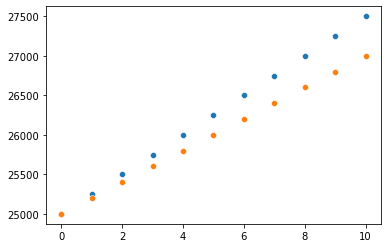

In [62]:
p_achat = 25000
tco_year = 250
p2_achat = 25000
tco2_year = 200
sns.scatterplot(x=range(0,11) ,y=(range(p_achat,p_achat+11*tco_year,tco_year)))
sns.scatterplot(x=range(0,11) ,y=(range(p2_achat,p2_achat+11*tco2_year,tco2_year)))

In [63]:
pd.DataFrame(
     np.random.randn(50, 3),
     columns=["GEV", "EV"])

,a,b,c
0,0.116347,-0.657413,-0.981577
1,-1.514197,0.782649,1.087587
2,-0.171306,-0.750765,0.134564
3,0.434982,-0.140455,0.216798
4,-0.552280,0.167965,0.813305
5,0.541427,0.040730,1.415442
6,-0.180755,-1.460849,0.734624
7,1.219514,0.070285,-1.603996
8,-1.251762,-1.972514,-0.538689
9,-1.080746,0.545806,-0.549966


In [66]:
pd.DataFrame((range(int(df_gev_TCO['Price (€)']),int(df_gev_TCO['Price (€)'])+11*int(df_gev_TCO['TCO_year']),int(df_gev_TCO['TCO_year'])))),
(range(int(df_TCO['Price with Incentive (€)'].iloc[0]),int(df_TCO['Price with Incentive (€)'].iloc[0])+11*int(df_TCO['TCO_year'].iloc[0]),int(df_TCO['TCO_year'].iloc[0])),columns=["GEV", "EV"])



SyntaxError: invalid syntax (2289928788.py, line 2)

In [73]:
pd.DataFrame({"a":(range(p_achat,p_achat+11*tco_year,tco_year)),"b":(range(p2_achat,p2_achat+11*tco2_year,tco2_year))})


,a,b
0,25000,25000
1,25250,25200
2,25500,25400
3,25750,25600
4,26000,25800
5,26250,26000
6,26500,26200
7,26750,26400
8,27000,26600
9,27250,26800


In [75]:
pd.DataFrame({"GEV": range(int(df_gev_TCO['Price (€)']),/
                           int(df_gev_TCO['Price (€)'])+11*int(df_gev_TCO['TCO_year']),/
                           int(df_gev_TCO['TCO_year'])),/
              "EV": range(int(df_TCO['Price with Incentive (€)'].iloc[0]),/
                          int(df_TCO['Price with Incentive (€)'].iloc[0])+11*int(df_TCO['TCO_year'].iloc[0]),/
                          int(df_TCO['TCO_year'].iloc[0]))})
              

SyntaxError: unexpected EOF while parsing (1712702390.py, line 2)